# HW2
# Yuwei Bao
# 9/3/2024

In [34]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import numpy as np
import math
import matplotlib.pyplot as  plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist

## HW2-1: A complete example of preparing and fitting a neural net model to CIFAR-10 dataset
(p.12) Download CIFAR-10 dataset from Keras, and repeat all the procedures for MNIST, including the full evaluation. Changes need to be made because of the dataset shape. What is the training/testing accuracy? (Optional) Does the result change with more epochs?

### Codes from lecture slides

In [29]:
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# print(train_images.shape)
# print(len(train_labels))
# print(train_labels)
# print(test_images.shape)
# print(len(test_labels))
# print(test_labels)

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2079 - loss: 3.1309
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3464 - loss: 1.8244
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3865 - loss: 1.7236
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4155 - loss: 1.6501
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4259 - loss: 1.6210


In [ ]:
# 2.1.6 Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
print("First prediction")
print(predictions[0])
print("Max in the prediction")
print(predictions[0].argmax())
print("The true answer")
print(test_labels[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
First prediction
[0.03249297 0.08683707 0.11821125 0.3868403  0.01620077 0.21695372
 0.04479579 0.00385466 0.08477233 0.00904112]
Max in the prediction
3
The true answer
[3]


In [ ]:
# 2.1.7 Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4273 - loss: 1.6161
test_acc: 0.4250999987125397


**The training/testing accuracy is 0.4250999987125397**

### With 10 Epochs

In [ ]:
# 2.1.5 "Fitting" the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc for 10 epoch: {test_acc}")

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4364 - loss: 1.5947
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4493 - loss: 1.5597
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4511 - loss: 1.5506
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.4636 - loss: 1.5227
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.4656 - loss: 1.5090
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4790 - loss: 1.4799
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4765 - loss: 1.4808
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4802 - loss: 1.4694
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4917 - loss: 1.4399
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4947 - loss: 1.4271
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4637 - loss: 1.5189
test_acc for 10 epoch: 0.4603999853134155


**The training/testing accuracy for 10 epochs is 0.4603999853134155**

### With 100 Epochs

In [ ]:
# 2.1.5 "Fitting" the model
model.fit(train_images, train_labels, epochs=100, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc for 100 epoch: {test_acc}")

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4960 - loss: 1.4265
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5061 - loss: 1.4064
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5062 - loss: 1.4017
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5071 - loss: 1.3977
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5150 - loss: 1.3772
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5172 - loss: 1.3658
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5167 - loss: 1.3669
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5228 - loss: 1.3530
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5309 - loss: 1.3356
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5342 - loss: 1.3194
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.5354 - loss: 1.3250
Epoch 12/100
391/39

**The training/testing accuracy for 100 epochs is 0.48669999837875366**

**The accuracy slightly increases with more epochs**

## HW2-2
(p.27) First extract the first 10 images of each digit (=total of 100) from MNIST training set. Next, use matplotlib.pyplot.subplot to plot first 100 MNIST training images into a 10 x 10 tile. (See the slide for the example plot.)

(10, 28, 28)
(10, 28, 28)
(10, 28, 28)
(10, 28, 28)
(10, 28, 28)
(10, 28, 28)
(10, 28, 28)
(10, 28, 28)
(10, 28, 28)
(10, 28, 28)


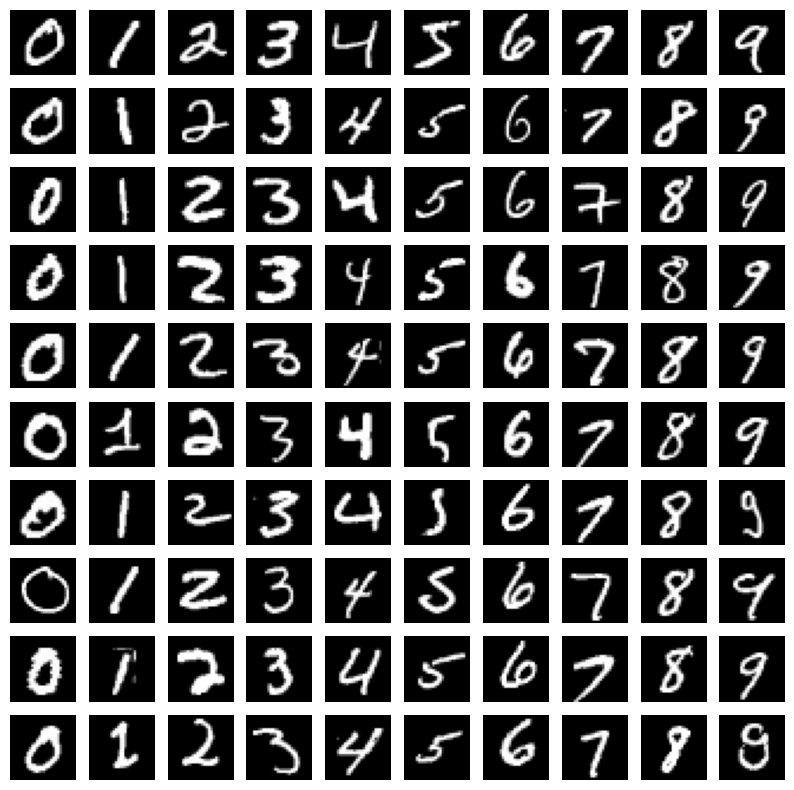

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Extract the first 10 images of each digit

selected_images = []
selected_labels = []
for digit in range(10):
    digit_images = train_images[train_labels == digit][:10]
    print(digit_images.shape)
    selected_images.extend(digit_images)
    selected_labels.extend([digit] * 10)

selected_images_np = np.array(selected_images).reshape(10, 10, 28, 28)
transposed_images = selected_images_np.transpose(1, 0, 2, 3)
transposed_images = transposed_images.reshape(100, 28, 28)

# Plot the transposed images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(transposed_images[i], cmap='gray')
    plt.axis('off')

plt.show()

## HW2-3
To evaluate using Keras previously, we used

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Compute training and test accuracy of the model without using the evaluate() function. Compare those numbers with the results from the evaluate() function.

### Codes from lecture slides

In [11]:
# Naive code in the lecture

## A simple dense class
class NaiveDense:
  def __init__(self, input_size, output_size, activation):
      self.activation = activation
      w_shape = (input_size, output_size)
      w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
      self.W = tf.Variable(w_initial_value)
      b_shape = (output_size,)
      b_initial_value = tf.zeros(b_shape)
      self.b = tf.Variable(b_initial_value)
  def __call__(self, inputs):
      return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
      return [self.W, self.b]

## A simple sequential class to chain the layers
class NaiveSequential:
  def __init__(self, layers):
      self.layers = layers
  def __call__(self, inputs):
      x = inputs
      for layer in self.layers:
        x = layer(x)
      return x
  @property
  def weights(self):
      weights = []
      for layer in self.layers:
        weights += layer.weights
      return weights

## A mock Keras model
model = NaiveSequential([
  NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
  NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

## A batch generator
class BatchGenerator:
  def __init__(self, images, labels, batch_size=128):
      assert len(images) == len(labels)
      self.index = 0
      self.images = images
      self.labels = labels
      self.batch_size = batch_size
      self.num_batches = math.ceil(len(images) / batch_size)
  def next(self):
      images = self.images[self.index : self.index + self.batch_size]
      labels = self.labels[self.index : self.index + self.batch_size]
      self.index += self.batch_size
      return images, labels

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
      predictions = model(images_batch)
      per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
      average_loss = tf.reduce_mean(per_sample_losses)

    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

## Update weight naively
learning_rate = 1e-3
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate) ## assign_sub is “-=“

## The full training loop
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

## Now run fit()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
fit(model, train_images, train_labels, epochs=10, batch_size=128)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 0
loss at batch 0: 6.21
loss at batch 100: 2.27
loss at batch 200: 2.26
loss at batch 300: 2.11
loss at batch 400: 2.24
Epoch 1
loss at batch 0: 1.94
loss at batch 100: 1.92
loss at batch 200: 1.88
loss at batch 300: 1.72
loss at batch 400: 1.85
Epoch 2
loss at batch 0: 1.61
loss at batch 100: 1.62
loss at batch 200: 1.55
loss at batch 300: 1.44
loss at batch 400: 1.52
Epoch 3
loss at batch 0: 1.35
loss at batch 100: 1.37
loss at batch 200: 1.28
loss at batch 300: 1.22
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.19
loss at batch 200: 1.07
loss at batch 300: 1.06
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.04
loss at batch 200: 0.92
loss at batch 300: 0.93
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.93
loss at batch 200: 0.82
loss at batch 300: 0.84
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.84
loss at batch

### Naive method - calculate accuracy (update weight naively)


In [24]:
# Calculate accuracy
def get_accuracy(images, labels):
  predictions = model(images)
  predicted_labels = np.argmax(predictions, axis=1)
  # Calculate accuracy
  correct_predictions = np.sum(predicted_labels == labels)
  accuracy = correct_predictions / labels.shape[0]
  return accuracy

train_acc = get_accuracy(train_images, train_labels)
test_acc = get_accuracy(test_images, test_labels)

print(f"train_acc of Naive model is: {train_acc}")
print(f"test_acc of Naive model is: {test_acc}")


train_acc of Naive model is: 0.8108166666666666
test_acc of Naive model is: 0.8188


In [28]:
# Recall Keras codes result
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Model
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])

# Compilation
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Preparing the image data; adjust the dataset size
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# Training
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Evaluate
train_loss, train_acc = model.evaluate(train_images, train_labels)
print(f"train_acc: {train_acc}")
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8707 - loss: 0.4402
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1171
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0742
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0511
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0383
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9922 - loss: 0.0276
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9934 - loss: 0.0225
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0164
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9972 - loss: 0.0121
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0088
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9988 - loss: 0.0060
train_acc: 0.9989833235740662
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 

**Summary: With 10 epoches, the Naive method has training accuracy 0.8108166666666666 and test accuracy 0.8188 while the Keras method has training accuracy 0.9989833235740662 and test accuracy 0.9828000068664551.**

> Add blockquote



## Naive method - calculate accuracy (using Keras.Optimizer updating weight)

**I am curious if updating weight using Optimizer from Keras rather than naively changes the result**

In [33]:
# Naive code in the lecture
## A simple dense class
class NaiveDense:
  def __init__(self, input_size, output_size, activation):
      self.activation = activation
      w_shape = (input_size, output_size)
      w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
      self.W = tf.Variable(w_initial_value)
      b_shape = (output_size,)
      b_initial_value = tf.zeros(b_shape)
      self.b = tf.Variable(b_initial_value)
  def __call__(self, inputs):
      return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
      return [self.W, self.b]

## A simple sequential class to chain the layers
class NaiveSequential:
  def __init__(self, layers):
      self.layers = layers
  def __call__(self, inputs):
      x = inputs
      for layer in self.layers:
        x = layer(x)
      return x
  @property
  def weights(self):
      weights = []
      for layer in self.layers:
        weights += layer.weights
      return weights

## A mock Keras model
model = NaiveSequential([
  NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
  NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

## A batch generator
class BatchGenerator:
  def __init__(self, images, labels, batch_size=128):
      assert len(images) == len(labels)
      self.index = 0
      self.images = images
      self.labels = labels
      self.batch_size = batch_size
      self.num_batches = math.ceil(len(images) / batch_size)
  def next(self):
      images = self.images[self.index : self.index + self.batch_size]
      labels = self.labels[self.index : self.index + self.batch_size]
      self.index += self.batch_size
      return images, labels

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
      predictions = model(images_batch)
      per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
      average_loss = tf.reduce_mean(per_sample_losses)

    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

## Use an Optimizer instance from Keras

optimizer = optimizers.SGD(learning_rate=1e-3)
def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

## The full training loop
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

## Now run fit()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
fit(model, train_images, train_labels, epochs=10, batch_size=128)

# Calculate accuracy
print(f"train_acc of Naive model with weight updated by optimizer is: {train_acc}")
print(f"test_acc of Naive model with weight updated by optimizer is: {test_acc}")


Epoch 0
loss at batch 0: 5.44
loss at batch 100: 2.26
loss at batch 200: 2.21
loss at batch 300: 2.09
loss at batch 400: 2.22
Epoch 1
loss at batch 0: 1.91
loss at batch 100: 1.89
loss at batch 200: 1.82
loss at batch 300: 1.70
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.59
loss at batch 200: 1.50
loss at batch 300: 1.42
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.32
loss at batch 100: 1.35
loss at batch 200: 1.24
loss at batch 300: 1.20
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.17
loss at batch 200: 1.04
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.03
loss at batch 200: 0.91
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.84
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

**In conclusion: With 10 epoches, the Naive method with weight updated by optimizer has training accuracy 0.9989833235740662 and test accuracy 0.9828000068664551 while the Keras method has training accuracy 0.9989833235740662 and test accuracy 0.9828000068664551.These two results are the same. We can use Naive method to acheive good accuracy as Keras if we use optimizer from Keras to update weight instead of updating weight naively.**